## Домашнее задание "**Модели ARIMA**"

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ._international-airline-passengers.csv to ._international-airline-passengers.csv
Saving ._monthly-car-sales-in-quebec-1960.csv to ._monthly-car-sales-in-quebec-1960.csv
Saving ._monthly-sales-of-company-x-jan-6.csv to ._monthly-sales-of-company-x-jan-6.csv
Saving ._Series to ._Series


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ._international-airline-passengers.csv to ._international-airline-passengers.csv
Saving ._monthly-car-sales-in-quebec-1960.csv to ._monthly-car-sales-in-quebec-1960.csv
Saving ._monthly-sales-of-company-x-jan-6.csv to ._monthly-sales-of-company-x-jan-6.csv
Saving ._Series to ._Series


In [8]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births-in-cal.csv to daily-total-female-births-in-cal.csv


In [9]:
from google.colab import files
uploaded = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv
Saving KAMPANYALI_URUNLER_LISTESI.xlsx to KAMPANYALI_URUNLER_LISTESI.xlsx


In [10]:
from google.colab import files
uploaded = files.upload()

Saving mean-monthly-air-temperature-deg.csv to mean-monthly-air-temperature-deg.csv
Saving monthly-boston-armed-robberies-j.csv to monthly-boston-armed-robberies-j.csv
Saving monthly-sales-of-company-x-jan-6.csv to monthly-sales-of-company-x-jan-6.csv


In [11]:
from google.colab import files
uploaded = files.upload()

Saving SelectionList.csv to SelectionList.csv


In [12]:
from google.colab import files
uploaded = files.upload()

Saving weekly-closings-of-the-dowjones-.csv to weekly-closings-of-the-dowjones-.csv


In [14]:
airlines_passengers = pd.read_csv("international-airline-passengers.csv")

In [15]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [16]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [17]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


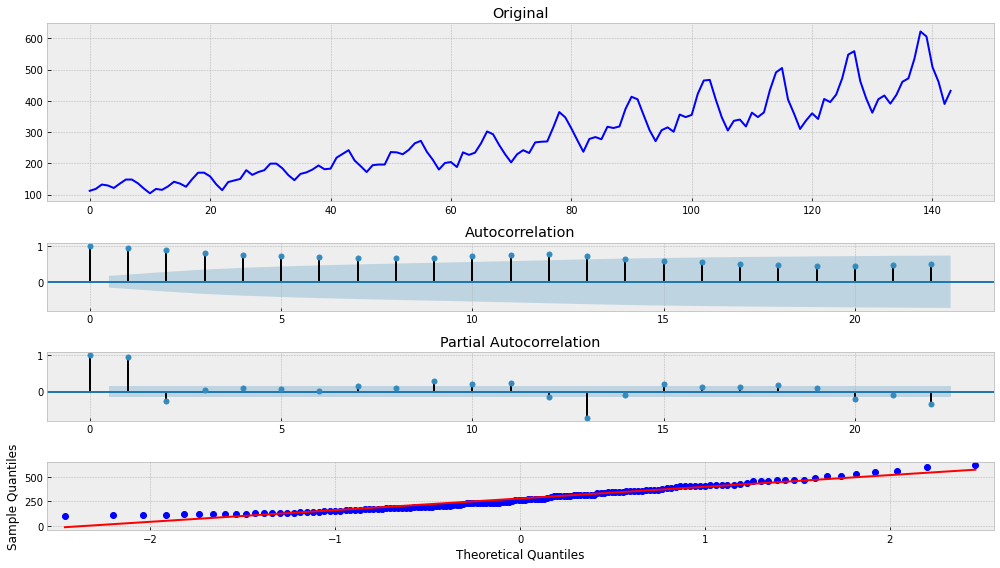

In [18]:
tsplot(airlines_passengers["Count"])

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


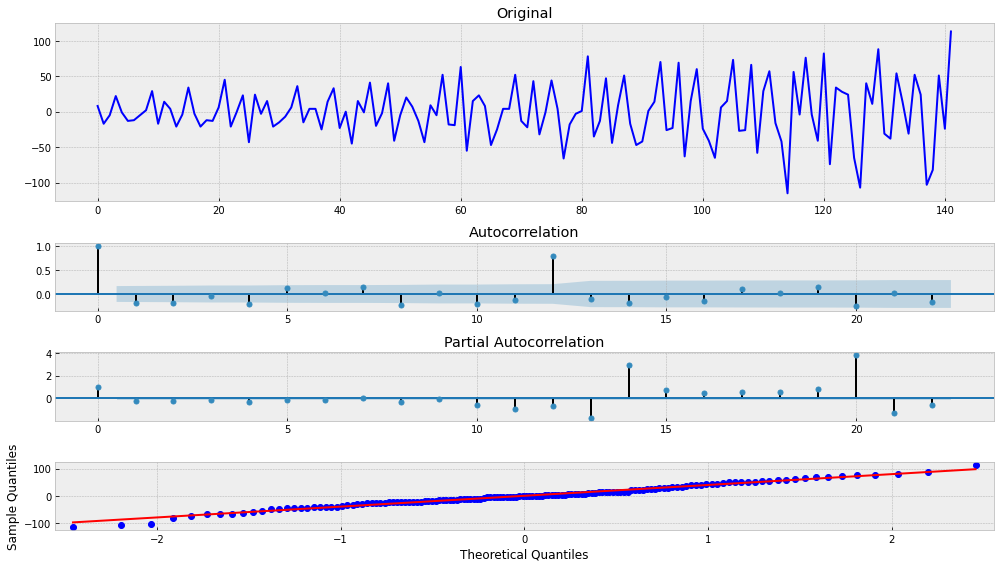

In [19]:
series = difference(airlines_passengers["Count"])
series = difference(series, 1)
tsplot(series)

In [20]:

def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [21]:
aic, order, mdl = _get_best_model(series)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 1345.29063 | order: (4, 0, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Results of Dickey-Fuller Test:
Test Statistic                  -2.218920
p-value                          0.199450
#Lags Used                      14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


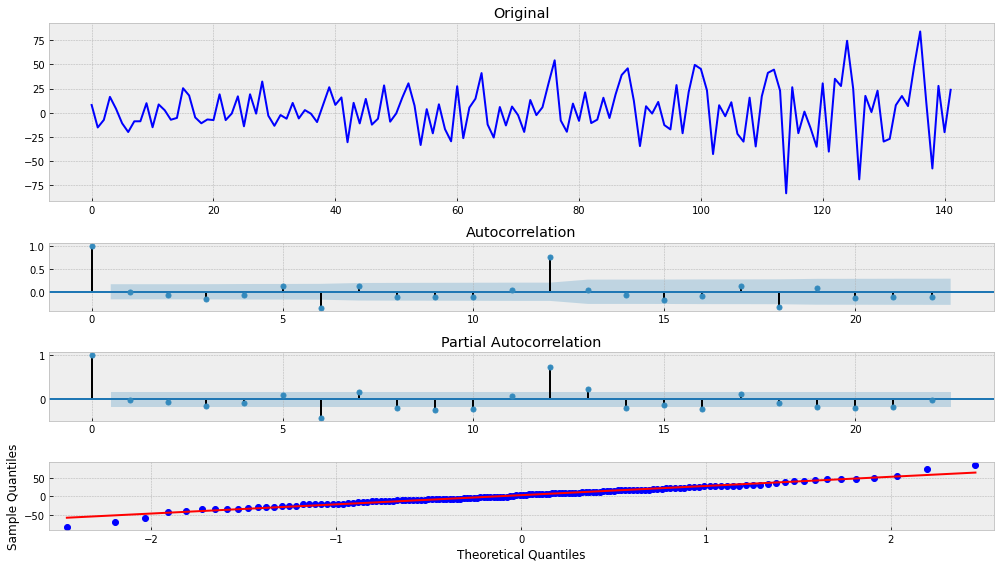

In [22]:
tsplot(mdl.resid)

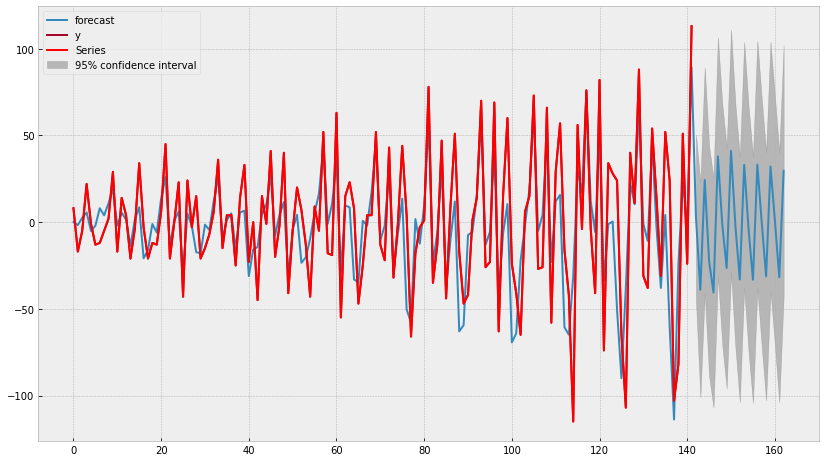

In [23]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    mdl.plot_predict(0, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()